### **Data Validation**

## **Data Validation**

This data set has 947 rows, 8 columns. I have validated all variables and I have made some changes after validation. All the columns are described in the data dictionary:

- recipe: 947 unique numeric identifiers of recipes. No cleaning is needed. The column was set as an index.
- calories: numeric values which show amount of calories. The column have had 52 missing values, from which 23 were duplicates.
- carbohydrate: numeric values which show amount of carbohydrate. The column have had 52 missing values, from which 23 were duplicates.
- sugar: numeric values which show amount of sugar. The column have had 52 missing values, from which 23 were duplicates.
- protein: numeric values which show amount of protein. The column have had 52 missing values, from which 23 were duplicates.
- category: the column had to contain 10 unique character values, but it had 1 extra value 'Chicken Breast'. No missing values.
- servings: 6 categories (not only numeric values) without missing values. The column has not contained enough values of 2 categories to estimate.
- high_traffic: 2 possible values: 'High' for recipes achieved high traffic, missing values for all other recipes.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('recipe_site_traffic_2212.csv')
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
data.isna().sum()

,0
recipe,0
calories,52
carbohydrate,52
sugar,52
protein,52
category,0
servings,0
high_traffic,373


In [5]:
missing_calories_recipes = data.index[data['calories'].isna()]

data[data.index.isin(missing_calories_recipes)].head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,NaN
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


In [6]:
data[data['calories'] < 0]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic


In [7]:
data.groupby('category')['calories'].mean()

,calories
category,
Beverages,177.732174
Breakfast,331.880000
Chicken,566.732029
Chicken Breast,540.338511
Dessert,351.402078
Lunch/Snacks,478.848537
Meat,584.533784
One Dish Meal,579.090000
Pork,629.708082


In [8]:
data[data['carbohydrate'] < 0]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic


In [9]:
data.groupby('category')['carbohydrate'].mean()

,carbohydrate
category,
Beverages,15.955978
Breakfast,39.711698
Chicken,30.751304
Chicken Breast,21.833191
Dessert,55.661818
Lunch/Snacks,42.820976
Meat,22.159595
One Dish Meal,50.383433
Pork,28.076164


In [10]:
data[data['sugar'] < 0]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic


In [11]:
data.groupby('category')['sugar'].mean()

,sugar
category,
Beverages,12.537283
Breakfast,7.552264
Chicken,5.678261
Chicken Breast,5.098723
Dessert,35.228442
Lunch/Snacks,5.309146
Meat,5.813649
One Dish Meal,6.011642
Pork,8.040137


In [12]:
data[data['protein'] < 0]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic


In [13]:
data.groupby('category')['protein'].mean()

,protein
category,
Beverages,0.594783
Breakfast,16.957170
Chicken,41.843913
Chicken Breast,52.161383
Dessert,5.759870
Lunch/Snacks,19.610976
Meat,40.377027
One Dish Meal,35.926418
Pork,43.797671


In [14]:
data['recipe'].nunique()

947

In [15]:
data['category'].value_counts()

,count
category,
Breakfast,106
Chicken Breast,98
Beverages,92
Lunch/Snacks,89
Potato,88
Pork,84
Vegetable,83
Dessert,83
Meat,79


In [16]:
data['servings'].value_counts()

,count
servings,
4,389
6,197
2,183
1,175
4 as a snack,2
6 as a snack,1


In [17]:
data['high_traffic'].value_counts()

,count
high_traffic,
High,574


In [18]:
clean_data = data.copy()

clean_data = clean_data.set_index('recipe')
clean_data.duplicated().sum()

23

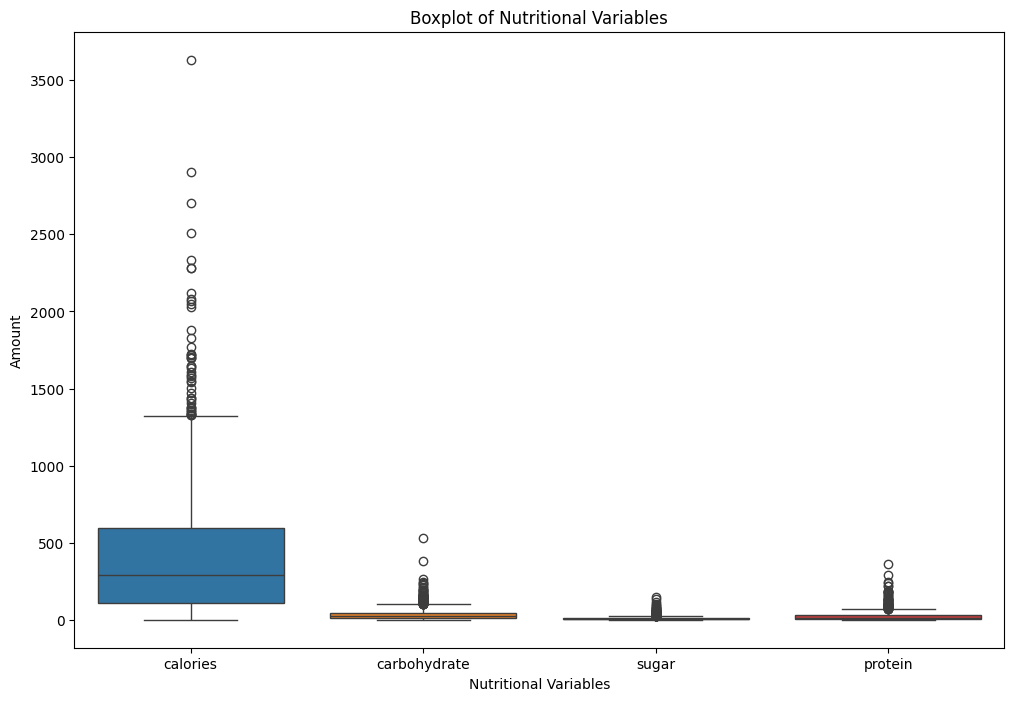

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['calories', 'carbohydrate', 'sugar', 'protein']])
plt.xlabel("Nutritional Variables")
plt.ylabel("Amount")
plt.title("Boxplot of Nutritional Variables")
plt.show()

### **Data Cleaning**

In this section:
- I have dropped 23 duplicates containing missing values in calories, carbohydrate, sugar, protein.
- I have filled missing values in calories, carbohydrate, sugar, protein with the mean of each column for each category.
- I have replaced all missing values in high_traffic with 'Low'.
- I have replaced '4 as a snack' to '4', '6 as a snack' to 6 in servings as there were not enough values to estimate these categories separately.
- I have replaced 'Chicken Breast' with 'Chicken' as this category was extra.

In [20]:
clean_data.drop_duplicates(inplace=True)
clean_data.duplicated().sum()

0

In [21]:
clean_data.isna().sum()

,0
calories,29
carbohydrate,29
sugar,29
protein,29
category,0
servings,0
high_traffic,369


In [22]:
clean_data['high_traffic'] = clean_data['high_traffic'].fillna('Low')
clean_data['high_traffic'].value_counts()

,count
high_traffic,
High,555
Low,369


In [23]:
clean_data['calories'] = clean_data['calories'].fillna(clean_data.groupby('category')['calories'].transform('mean'))
clean_data['carbohydrate'] = clean_data['carbohydrate'].fillna(clean_data.groupby('category')['carbohydrate'].transform('mean'))
clean_data['sugar'] = clean_data['sugar'].fillna(clean_data.groupby('category')['sugar'].transform('mean'))
clean_data['protein'] = clean_data['protein'].fillna(clean_data.groupby('category')['protein'].transform('mean'))

clean_data[clean_data.index.isin(missing_calories_recipes)]

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
23,82.73,3.17,7.95,26.04,Breakfast,4,Low
48,43.91,48.16,4.58,7.92,Breakfast,4,Low
82,65.69,7.99,9.23,14.52,Breakfast,4,High
89,193.17,4.49,3.01,46.90,Breakfast,4,High
116,26.76,5.17,2.39,4.45,Vegetable,4,High
121,1114.94,31.45,13.02,1.33,Meat,2,High
136,115.95,156.23,7.90,49.63,One Dish Meal,4,High
149,205.98,61.85,2.89,14.45,Chicken,4,High
187,515.49,5.88,13.29,13.96,Lunch/Snacks,1,High


In [24]:
clean_data.isna().sum()

,0
calories,0
carbohydrate,0
sugar,0
protein,0
category,0
servings,0
high_traffic,0


In [25]:
clean_data['servings'] = clean_data['servings'].replace('4 as a snack', '4')
clean_data['servings'] = clean_data['servings'].replace('6 as a snack', '6')

clean_data['servings'].unique()

array(['6', '4', '1', '2'], dtype=object)

In [26]:
clean_data['category'] = clean_data['category'].replace('Chicken Breast', 'Chicken')

clean_data['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

### **Data Type Validation**

In this section:
- I have changed column servings to integer data type.
- I have changed column category to categorical data type.
- I have changed column high_traffic to categorical data type.

In [27]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      924 non-null    float64
 1   carbohydrate  924 non-null    float64
 2   sugar         924 non-null    float64
 3   protein       924 non-null    float64
 4   category      924 non-null    object 
 5   servings      924 non-null    object 
 6   high_traffic  924 non-null    object 
dtypes: float64(4), object(3)
memory usage: 57.8+ KB


In [28]:
clean_data['servings'] = clean_data['servings'].astype(int)
clean_data['category'] = clean_data['category'].astype('category')
clean_data['high_traffic'] = clean_data['high_traffic'].astype('category')

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   calories      924 non-null    float64 
 1   carbohydrate  924 non-null    float64 
 2   sugar         924 non-null    float64 
 3   protein       924 non-null    float64 
 4   category      924 non-null    category
 5   servings      924 non-null    int64   
 6   high_traffic  924 non-null    category
dtypes: category(2), float64(4), int64(1)
memory usage: 45.6 KB


### **Exploratory Analysis**

I have investigated the target variable 'high traffic', features of each recipe, relationships between target variable and features, and between features.

### **Numeric variables - calories, carbohydrate, sugar, protein**

I have decided to investigate the distributions of numeric variables to check if normalization is needed in the future. It might be beneficial for logistic regression. From the histograms we can see that all the numeric variables are right-skewed. This won't influence model performance, but the numeric variables must be scaled.

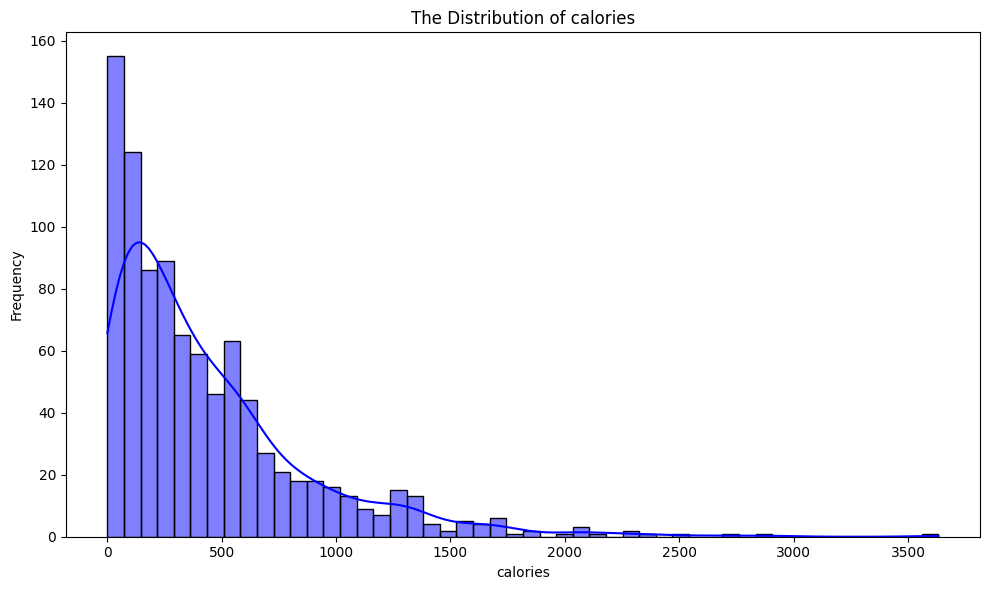

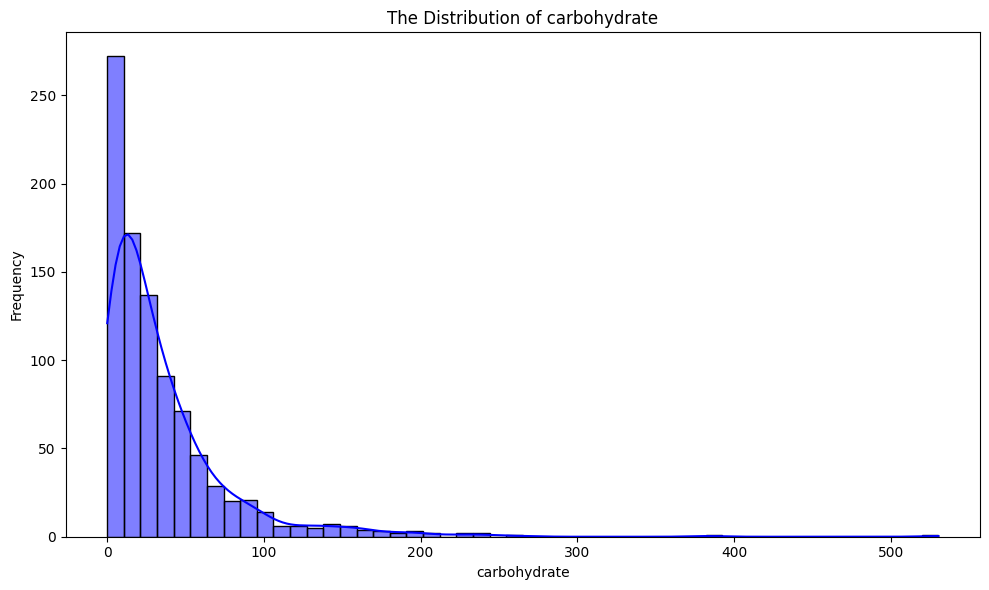

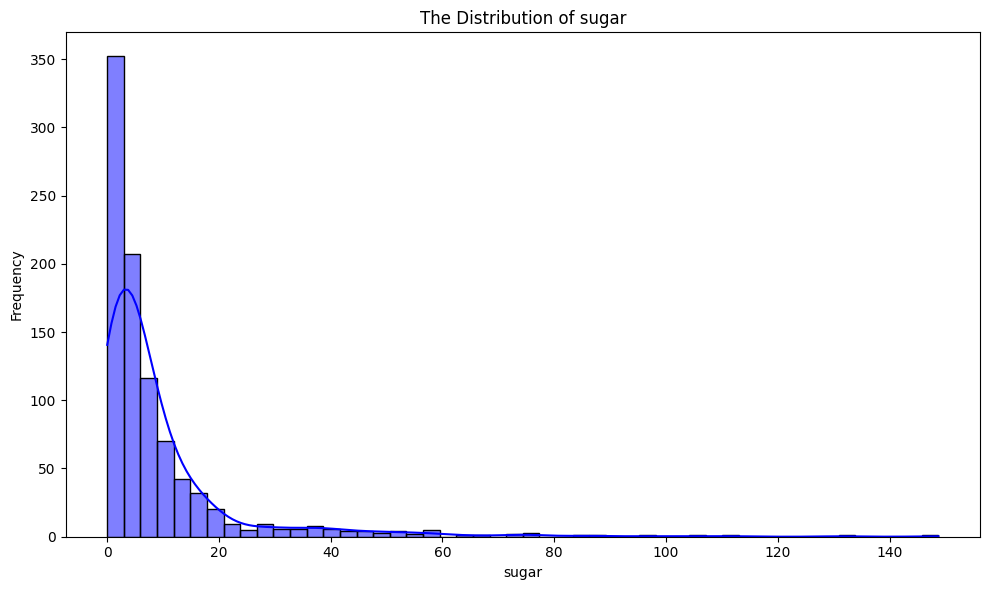

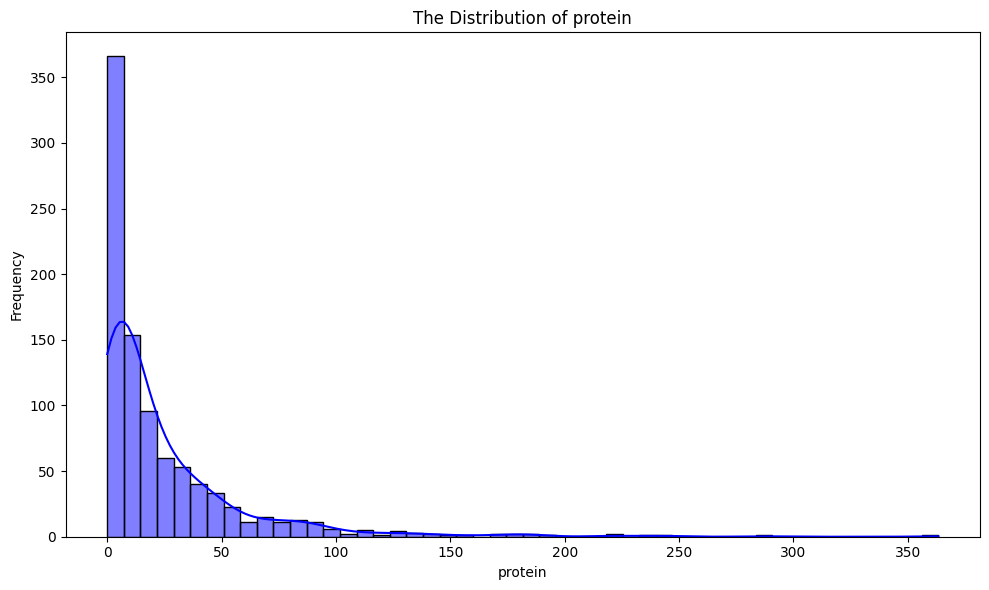

In [29]:
data_num = clean_data[['calories', 'carbohydrate', 'sugar', 'protein']]


for col in data_num.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(clean_data[col], kde=True, color='blue', bins=50)

    plt.title('The Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

**Correlation between numeric variables - calories, carbohydrate, sugar, protein**
I have investigated the correlation between numeric variables. All numeric variables have weak or almost no correlation. Calories and protein have the highest positive correlation, sugar and protein have the highest negative correlation.

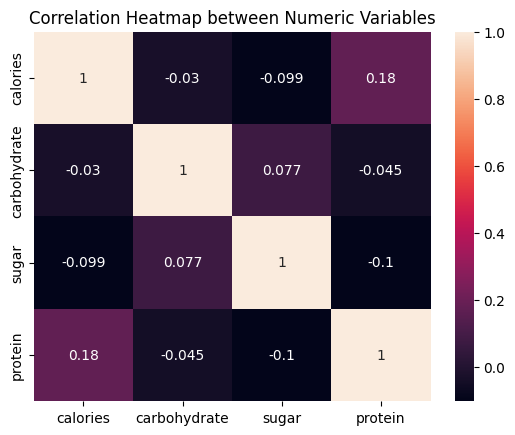

In [30]:
sns.heatmap(data_num.corr(),annot=True).set(title='Correlation Heatmap between Numeric Variables');

**Relationships between numeric variables - calories, carbohydrate, sugar, protein**

No  paterns or linear relationships were found between numeric variables on the charts.

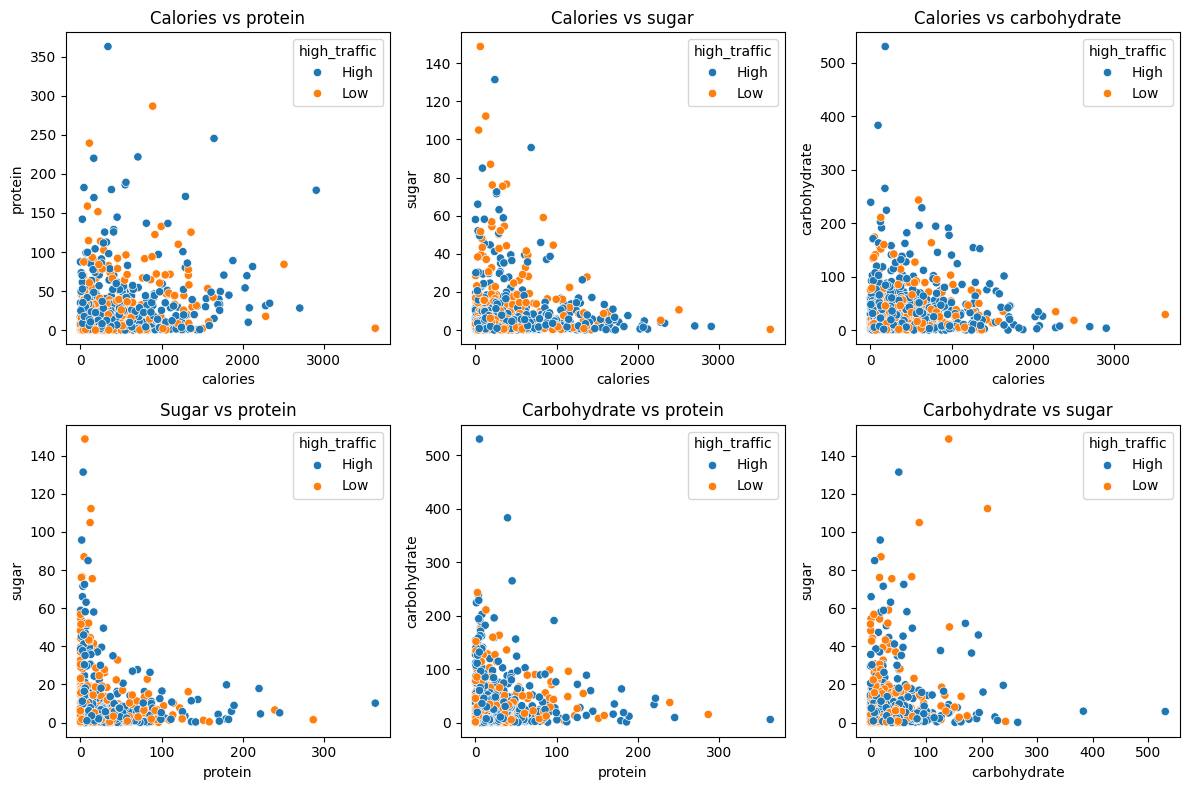

In [31]:
columns = ['calories', 'carbohydrate', 'sugar', 'protein']

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

sns.scatterplot(x='calories', y='protein', data=clean_data, ax=axes[0], hue='high_traffic')
axes[0].set_title(f'Calories vs protein')

sns.scatterplot(x='calories', y='sugar', data=clean_data, ax=axes[1], hue='high_traffic')
axes[1].set_title(f'Calories vs sugar')

sns.scatterplot(x='calories', y='carbohydrate', data=clean_data, ax=axes[2], hue='high_traffic')
axes[2].set_title(f'Calories vs carbohydrate')

sns.scatterplot(x='protein', y='sugar', data=clean_data, ax=axes[3], hue='high_traffic')
axes[3].set_title(f'Sugar vs protein')

sns.scatterplot(x='protein', y='carbohydrate', data=clean_data, ax=axes[4], hue='high_traffic')
axes[4].set_title(f'Carbohydrate vs protein')

sns.scatterplot(x='carbohydrate', y='sugar', data=clean_data, ax=axes[5], hue='high_traffic')
axes[5].set_title(f'Carbohydrate vs sugar')

plt.tight_layout()

**Relationships between target and numeric variables - calories, carbohydrate, sugar, protein**

I have investigated the average quantity of numeric variables for two outcomes of 'high_traffic' - True and False. We can see that calories, carbohydrate, protein are inclined to have higher average value to result in high traffic. Average sugar amount is reduced to result in high traffic.

<Axes: xlabel='high_traffic', ylabel='calories'>

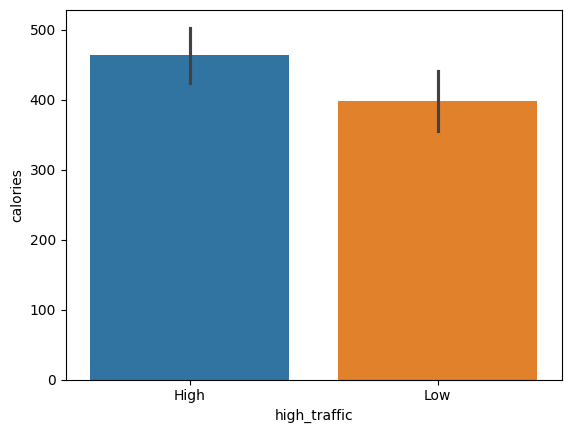

In [32]:
sns.barplot(x='high_traffic', y='calories', data=clean_data, hue='high_traffic', legend=False)

<Axes: xlabel='high_traffic', ylabel='carbohydrate'>

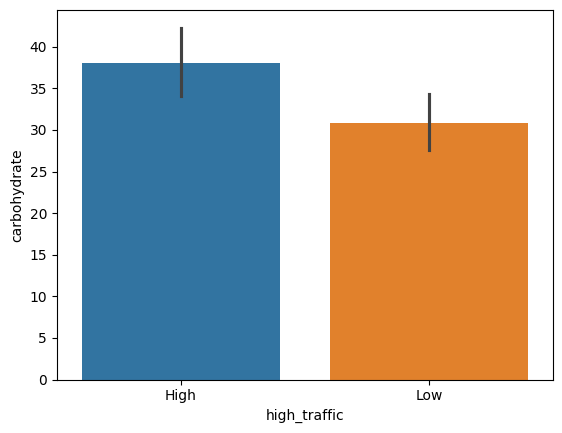

In [33]:
sns.barplot(x='high_traffic', y='carbohydrate', data=clean_data, hue='high_traffic', legend=False)

<Axes: xlabel='high_traffic', ylabel='sugar'>

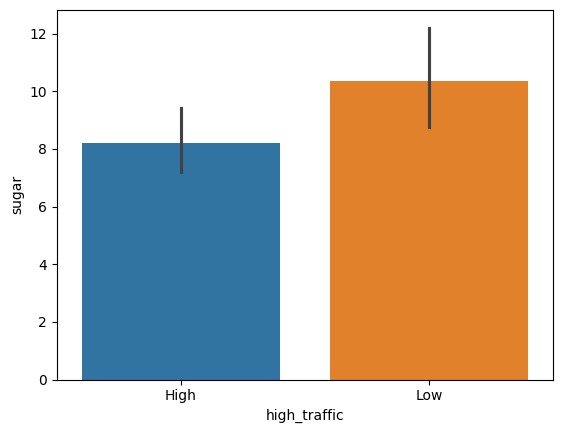

In [34]:
sns.barplot(x='high_traffic', y='sugar', data=clean_data, hue='high_traffic', legend=False)

<Axes: xlabel='high_traffic', ylabel='protein'>

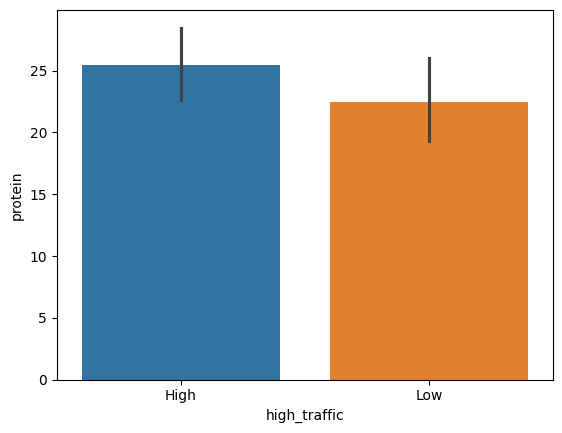

In [35]:
sns.barplot(x='high_traffic', y='protein', data=clean_data, hue='high_traffic', legend=False)

**Relationships between target and categorical variables - servings, category**

I have examined the distributions between recipe categories and high traffic. There is a strong relationship between some catogories and high traffic.
The relationship between servings and high traffic is less strong.
I can predict that categories will influence the model's outcome the most.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Breakfast'),
  Text(2, 0, 'Chicken'),
  Text(3, 0, 'Dessert'),
  Text(4, 0, 'Lunch/Snacks'),
  Text(5, 0, 'Meat'),
  Text(6, 0, 'One Dish Meal'),
  Text(7, 0, 'Pork'),
  Text(8, 0, 'Potato'),
  Text(9, 0, 'Vegetable')])

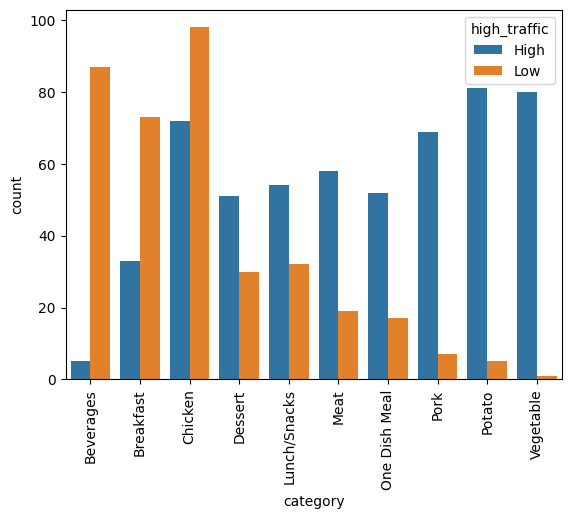

In [36]:
sns.countplot(x='category', data=clean_data, hue='high_traffic')
plt.xticks(rotation=90)

<Axes: xlabel='servings', ylabel='count'>

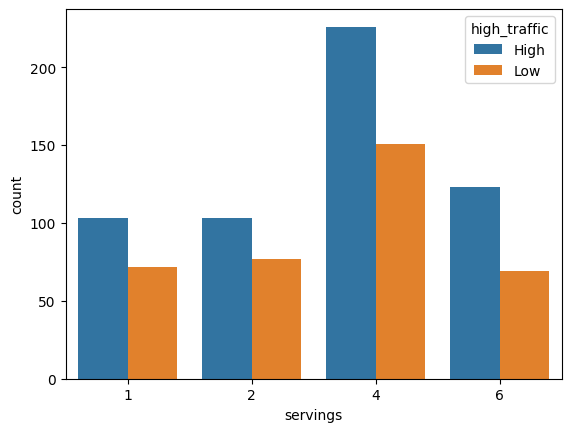

In [37]:
sns.countplot(x='servings', data=clean_data, hue='high_traffic')

## **Model Fitting & Evaluation**

Predicting traffic is a binary classification problem in machine learning. I have chosen the Logistic Regression model for its practicality and flexibility.
The comparison model I am choosing the Random Forest Classifier for its accuracy and robustness.
For the evaluation, I am choosing precision, recall and f1 score to evaluate the model.

- Precision  answers the question: Of all the instances that the model predicted as positive, how many were actually positive?
- Recall answers the question: Of all the actual positive instances, how many were correctly predicted as positive?
- f1 score is the harmonic mean of precision and recall, providing a balanced measure when you want to combine both metrics.

### **Prepare Data for modeling**

To enable modelling, we chose calories, carbohydrate, sugar, protein, servings and category as features, high_traffic as target variable. I also have made the following changes:

- Added standard deviation column for calories, carbohydrate, sugar, protein to increase model performance
- Scaled the numeric features
- Convert categorical features to numeric
- Split the data into  a training set and a test set





In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np

In [39]:
model_data = pd.get_dummies(clean_data, columns=['category'])

label_encoder = LabelEncoder()
model_data['high_traffic'] = label_encoder.fit_transform(clean_data['high_traffic'])

In [40]:
columns_to_std = ['calories','carbohydrate', 'sugar', 'protein']

model_data['std'] = clean_data[columns_to_std].apply(lambda row: np.std(row), axis=1)

In [41]:
column_order = ['calories',  'carbohydrate',   'sugar',  'protein', 'std' , 'servings','category_Beverages'  ,'category_Breakfast' , 'category_Chicken' ,  'category_Dessert' , 'category_Lunch/Snacks' ,'category_Meat',  'category_One Dish Meal',  'category_Pork',  'category_Potato', 'category_Vegetable' ,'high_traffic']
model_data = model_data[column_order]

In [42]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 1 to 947
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calories                924 non-null    float64
 1   carbohydrate            924 non-null    float64
 2   sugar                   924 non-null    float64
 3   protein                 924 non-null    float64
 4   std                     924 non-null    float64
 5   servings                924 non-null    int64  
 6   category_Beverages      924 non-null    bool   
 7   category_Breakfast      924 non-null    bool   
 8   category_Chicken        924 non-null    bool   
 9   category_Dessert        924 non-null    bool   
 10  category_Lunch/Snacks   924 non-null    bool   
 11  category_Meat           924 non-null    bool   
 12  category_One Dish Meal  924 non-null    bool   
 13  category_Pork           924 non-null    bool   
 14  category_Potato         924 non-null    bool   

In [43]:
X = model_data.drop(["high_traffic"],axis=1).values
y = model_data["high_traffic"].values
print("X : ",X.shape," y : ",y.shape)

X :  (924, 16)  y :  (924,)


In [44]:
model_data.head()

,calories,carbohydrate,sugar,protein,std,servings,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,high_traffic
recipe,,,,,,,,,,,,,,,,,
1,629.708082,28.076164,8.040137,43.797671,261.444332,6,False,False,False,False,False,False,False,True,False,False,0
2,35.480000,38.560000,0.660000,0.920000,18.147933,4,False,False,False,False,False,False,False,False,True,False,0
3,914.280000,42.680000,3.090000,2.880000,389.210353,1,False,True,False,False,False,False,False,False,False,False,1
4,97.030000,30.560000,38.630000,0.020000,35.114375,4,True,False,False,False,False,False,False,False,False,False,0
5,27.050000,1.850000,0.800000,0.530000,11.264798,4,True,False,False,False,False,False,False,False,False,False,1


In [45]:
numeric_features = X[:, :5]

st_scaler = StandardScaler()
st_scaler.fit(numeric_features)
numeric_features_scaler = st_scaler.transform(numeric_features)

X_scaler = np.concatenate((numeric_features_scaler, X[:, 5:]), axis=1)
X_scaler

array([[0.430880524367953, -0.16330176827917373, -0.07051504775860935,
        ..., True, False, False],
       [-0.9009398742260826, 0.0788292125338607, -0.5776174502488067,
        ..., False, True, False],
       [1.0686805482343675, 0.1739832837580913, -0.41064780722748684,
        ..., False, False, False],
       ...,
       [1.152638196192229, -0.13226501343445685, -0.37766614934673226,
        ..., True, False, False],
       [-0.38291715205575505, 0.014392353622306462, -0.5563167962008194,
        ..., False, True, False],
       [-0.5668126409757368, 0.2324152740972427, -0.1969541488750979,
        ..., False, False, False]], dtype=object)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler,
              y, test_size= 0.20, random_state=10)

print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)

X_train =  (739, 16)  y_train =  (739,)
X_test  =  (185, 16)  y_test =  (185,)


### **Logistic Regression Model**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report

In [48]:
logistic_model = LogisticRegression(max_iter=1000, C=5)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[79 24]
 [23 59]]
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       103
           1       0.71      0.72      0.72        82

    accuracy                           0.75       185
   macro avg       0.74      0.74      0.74       185
weighted avg       0.75      0.75      0.75       185



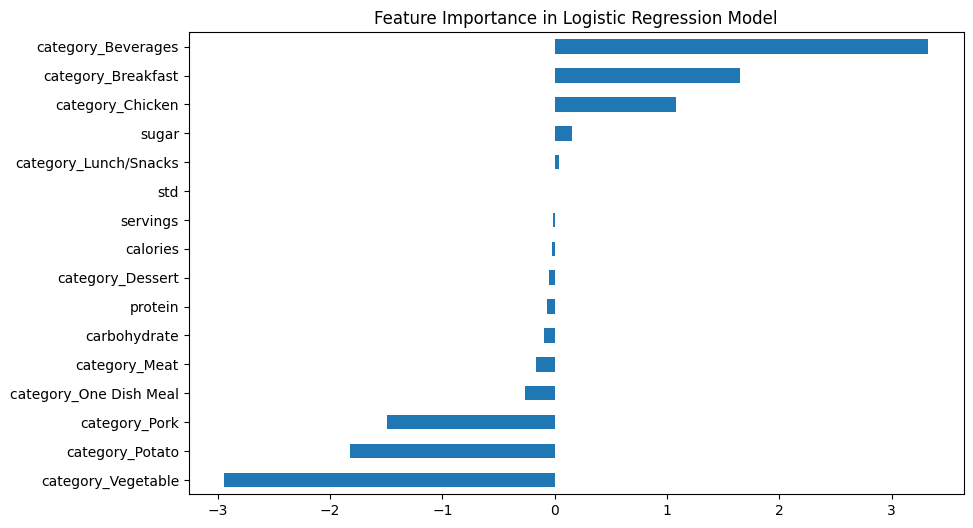

In [49]:
column_order = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'std',
                'category_Beverages', 'category_Breakfast', 'category_Chicken',
                'category_Dessert', 'category_Lunch/Snacks',
                'category_Meat', 'category_One Dish Meal', 'category_Pork',
                'category_Potato', 'category_Vegetable']

# Feature Importance
importances = pd.Series(logistic_model.coef_[0],index=column_order)
sorted_importances=importances.sort_values()
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

### **Random Forest Classifier Model**

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
random_forest_model = RandomForestClassifier(n_estimators=10,max_depth=10,min_samples_split=3, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[84 19]
 [44 38]]
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.82      0.73       103
           1       0.67      0.46      0.55        82

    accuracy                           0.66       185
   macro avg       0.66      0.64      0.64       185
weighted avg       0.66      0.66      0.65       185



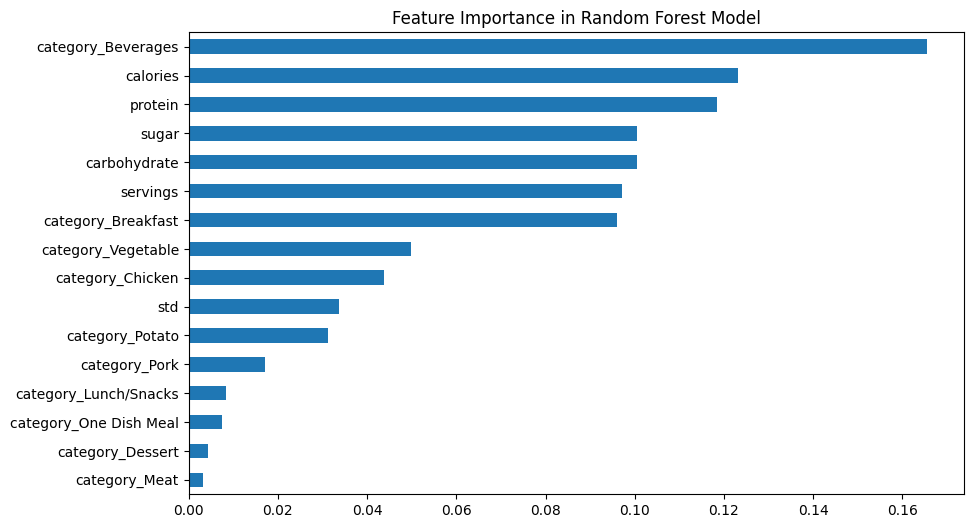

In [52]:
importances = pd.Series(random_forest_model.feature_importances_,index=column_order)
sorted_importances=importances.sort_values()
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.title('Feature Importance in Random Forest Model')
plt.show()

### **Results**

The precision scores of the Logistic Regression, and the Random Forest Classifier are 0.77 and 0.66, meaning the Logistic Regression model predicted high traffic more accurate. The recall results are 0.77 and 0.82 respectively, meaning the Random Forest Classifier model predicted more actual high traffic instances correctly. The f1 scores are 0.77 and 0.73 respectively, meaning the Logistic Regression model provided more balanced value of precision and recall. The accuracy results are 0.75 and 0.66 respectively, meaning the Logistic Regression model predicted high traffic instances more correctly in case of true positives and negatives.

### **Evaluate by Business Criteria**

We want to predict which recipes will lead to high traffic and correctly predict high traffic recipes 80% of the time. The recall is the most meaningful metric for this context. 77% and 82% of the actual high traffic instances were correctly identified by the models. Тevertheless all other metrics performed better for Logistic Regression model, which means that it handled the predictions more correctly in other aspects.

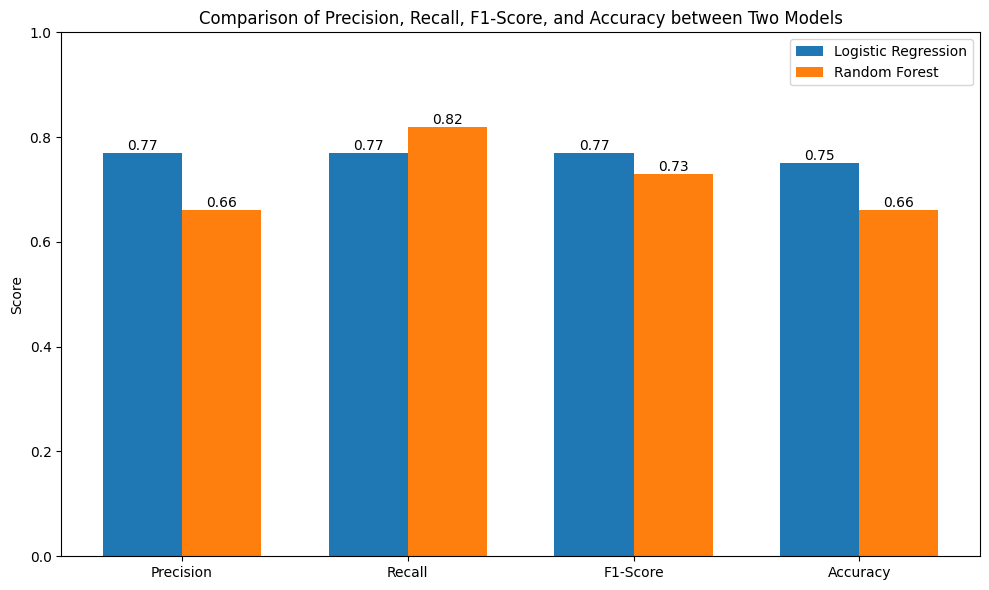

In [53]:
metrics = {
    'Model 1': [0.77, 0.77, 0.77, 0.75],
    'Model 2': [0.66, 0.82, 0.73, 0.66],
}

bar_width = 0.35
index = np.arange(len(metrics['Model 1']))

plt.figure(figsize=(10, 6))
bars1 = plt.bar(index, metrics['Model 1'], bar_width, label='Logistic Regression')
bars2 = plt.bar(index + bar_width, metrics['Model 2'], bar_width, label='Random Forest')


for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparison of Precision, Recall, F1-Score, and Accuracy between Two Models')
plt.xticks(index + bar_width / 2, ['Precision', 'Recall', 'F1-Score', 'Accuracy'])
plt.legend()

plt.tight_layout()
plt.show()
